In [1]:
%matplotlib inline

import matplotlib.pyplot as plt 
import numpy as np
from dataclasses import dataclass
from tqdm import tqdm
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
import utils

In [2]:
#setups
config = utils.config()
config.init = 0.0
config.iter_num = 1000
config.sample_num = 500
config.lr_large = 0.5
config.lr_small = 0.01
config.rho = 1.0

config

config(init=0.0, iter_num=1000, sample_num=500, lr_large=0.5, lr_small=0.01, rho=1.0)

/var/folders/42/_8jtb5594rddnjmwctnf_xzm0000gn/T/ipykernel_40277/1031075309.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


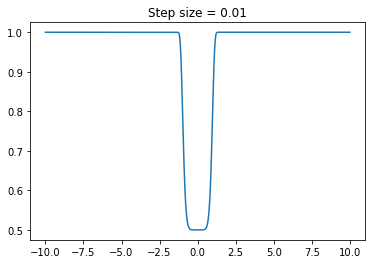

In [3]:
def func(x):
    return (1-jnp.exp(-x**8)/2)

x = np.linspace(-10, 10, 1000)
y = func(x)

fig, ax = plt.subplots() 
ax.plot(x, y)
plt.title('Step size = 0.01')
fig.show()

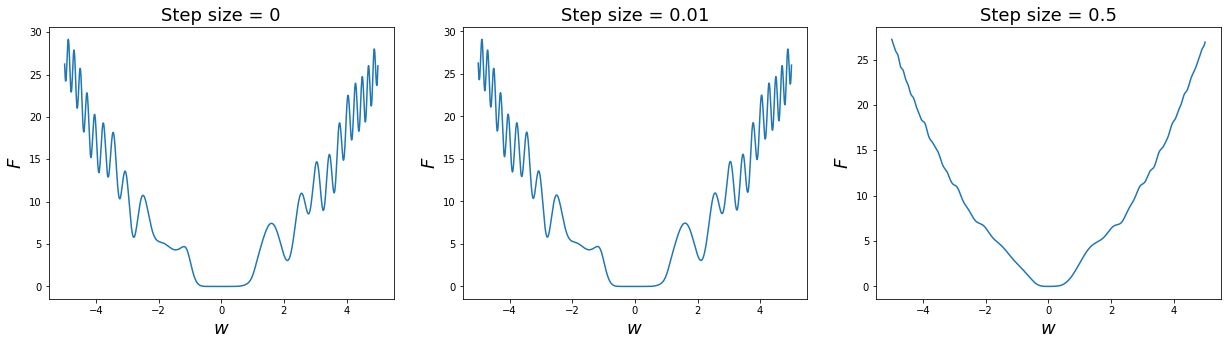

In [4]:
fig = plt.figure( figsize=(21,5) )
eta_list = [0, config.lr_small, config.lr_large]

for i in [0,1,2]:
    ax = plt.subplot(1,3,i+1)

    ax.set_xlabel("$w$", size=18)
    ax.set_ylabel("$F$", size=18)

    x = np.linspace(-5, 5, 1000)
    eta = eta_list[i]
    y = utils.smoothed_objective(x, eta)

    ax.plot(x, y)
    plt.title('Step size = %s' % eta, size=18)

# fig.show()
fig.savefig('smoothed_objective.png', bbox_inches='tight')

In [5]:
sgd_l = utils.optimize(config, 'SGD_large', utils.objective)
sgd_s = utils.optimize(config, 'SGD_small', utils.objective)

ave_sgd_l = utils.optimize(config, 'Ave_SGD_large', utils.objective)
ave_sgd_s = utils.optimize(config, 'Ave_SGD_small', utils.objective)

noisy_sgd_l = utils.optimize(config, 'Noisy_SGD_large', utils.objective)
noisy_sgd_s = utils.optimize(config, 'Noisy_SGD_small', utils.objective)

100%|█████████████████████████████████████████| 500/500 [22:37<00:00,  2.72s/it]


complete :  SGD_large


100%|█████████████████████████████████████████| 500/500 [39:44<00:00,  4.77s/it]


complete :  SGD_small


100%|███████████████████████████████████████| 500/500 [1:22:02<00:00,  9.84s/it]


complete :  Ave_SGD_large


100%|█████████████████████████████████████████| 500/500 [08:43<00:00,  1.05s/it]


complete :  Ave_SGD_small


100%|█████████████████████████████████████████| 500/500 [08:14<00:00,  1.01it/s]


complete :  Noisy_SGD_large


100%|█████████████████████████████████████████| 500/500 [09:53<00:00,  1.19s/it]

complete :  Noisy_SGD_small


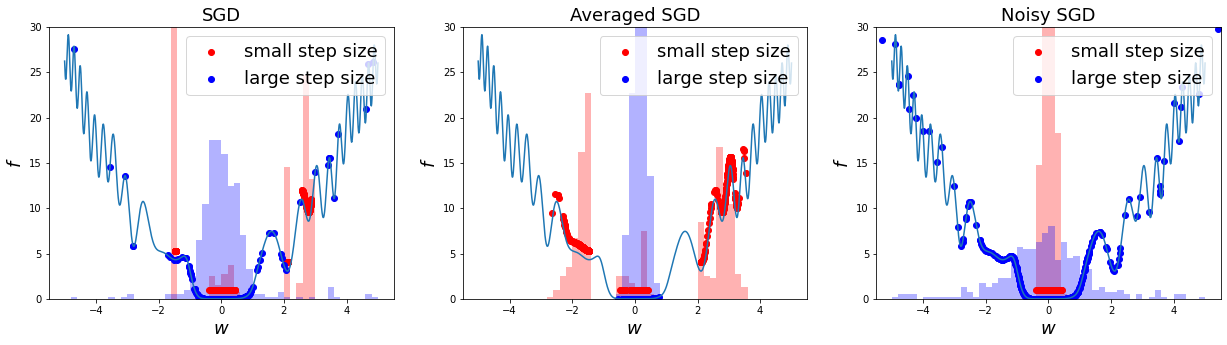

In [6]:
fig = plt.figure( figsize=(21,5) )
plt.rc('legend', fontsize=18)

weights = 0.25 * np.ones_like(noisy_sgd_s)

ax = plt.subplot(1,3,1)
ax.set_xlabel("$w$", size=18)
ax.set_ylabel("$f$", size=18)

x = np.linspace(-5, 5, 1000)
y = utils.objective(x)
    
plt.hist(sgd_s, range=(-5,5), bins=50, color='r', alpha=0.3, weights=weights)
plt.hist(sgd_l, range=(-5,5), bins=50, color='b', alpha=0.3, weights=weights)
ax.scatter(sgd_s, utils.objective(sgd_s)+1, color='r', label='small step size')
ax.scatter(sgd_l, utils.objective(sgd_l), color='b', label='large step size')
ax.plot(x, y)
plt.title('SGD', size=18)
plt.xlim(-5.5,5.5)
plt.ylim(0,30)
ax.legend(loc='upper right')

#-----
ax = plt.subplot(1,3,2)
ax.set_xlabel("$w$", size=18)
ax.set_ylabel("$f$", size=18)

x = np.linspace(-5, 5, 1000)
y = utils.objective(x)

plt.hist(ave_sgd_s, range=(-5,5), bins=50, color='r', alpha=0.3, weights=weights)
plt.hist(ave_sgd_l, range=(-5,5),  bins=50, color='b', alpha=0.3, weights=weights)
ax.scatter(ave_sgd_s, utils.objective(ave_sgd_s)+1, color='r', label='small step size')
ax.scatter(ave_sgd_l, utils.objective(ave_sgd_l), color='b', label='large step size')
ax.plot(x, y)
plt.title('Averaged SGD', size=18)
plt.xlim(-5.5,5.5)
plt.ylim(0,30)
ax.legend(loc='upper right')

#-----
ax = plt.subplot(1,3,3)
ax.set_xlabel("$w$", size=18)
ax.set_ylabel("$f$", size=18)

x = np.linspace(-5, 5, 1000)
y = utils.objective(x)

plt.hist(noisy_sgd_s, range=(-5,5), bins=50, color='r', alpha=0.3, weights=weights)
plt.hist(noisy_sgd_l, range=(-5,5), bins=50, color='b', alpha=0.3, weights=weights)
ax.scatter(noisy_sgd_s, utils.objective(noisy_sgd_s)+1, color='r', label='small step size')
ax.scatter(noisy_sgd_l, utils.objective(noisy_sgd_l), color='b', label='large step size')
ax.plot(x, y)
plt.title('Noisy SGD', size=18)
plt.xlim(-5.5,5.5)
plt.ylim(0,30)
ax.legend(loc='upper right')

#fig.show()
fig.savefig('alg_comparison.png', bbox_inches='tight')